# DBSCan Clustering to Identify Outliers

In [2]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sb
from pylab import rcParams

import sklearn
from sklearn.cluster import DBSCAN
from collections import Counter

In [3]:
%matplotlib inline
rcParams['figure.figsize']= 5,4
sb.set_style('whitegrid')

### Train your model and identify outliers

In [9]:
address = 'C:/Users/Admin/Downloads/iris.data.csv'
df = pd.read_csv(address, header=None, sep=',')
df.columns = ['Sepal_Lenghth', 'Sepal_Width', 'Petal_Length','Petal_Width', 'Species']

data = df.iloc[:,0:4].values
target = df.iloc[:,4].values
df.columns
df.shape

(150, 5)

#### Instantiate DBSCAN object

In [18]:
# min_samples -> each point must have min of 19 samples to be considered as a core point
# eps -> max distance between two samples is 0.8

In [18]:
model = DBSCAN(eps=0.8, min_samples=19).fit(data)
print(model)


DBSCAN(eps=0.8, min_samples=19)


In [15]:
outliers_df = pd.DataFrame(data)

# count the number of labels
print(Counter(model.labels_))

# print the index of rows that labeled as -1
print(outliers_df[model.labels_ == -1])

Counter({1: 94, 0: 50, -1: 6})
       0    1    2    3
98   5.1  2.5  3.0  1.1
105  7.6  3.0  6.6  2.1
117  7.7  3.8  6.7  2.2
118  7.7  2.6  6.9  2.3
122  7.7  2.8  6.7  2.0
131  7.9  3.8  6.4  2.0


This means that 6 records are assigned to label -1 which is considered as outliers! That is only %4 (6 out of 150)
Remember that we always want to have less than %5 of the original dataset as marked as outliers

####  Scatter plot

Text(0.5, 1.0, 'DBSCAN for Outlier Detection')

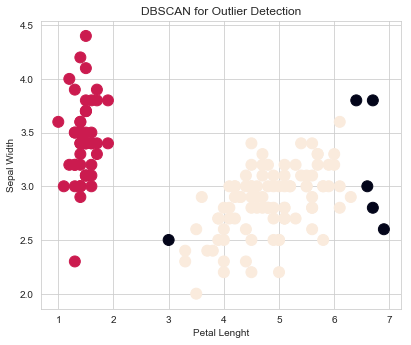

In [24]:
fig = plt.figure()# create a figure

ax = fig.add_axes([.1,.1,1,1])# add an axes [left ,bottom, width, height]
colors = model.labels_

ax.scatter(data[:,2], data[:,1], c =colors,  s=120)# s is size of points
ax.set_xlabel('Petal Lenght')
ax.set_ylabel('Sepal Width')
plt.title('DBSCAN for Outlier Detection')